In [79]:


import numpy as np # linear algebra
import pandas as pd # data processing


## This project is mainly focussed on Car Price Prediction.
## 1)Introduction
## 2)Loading Data, and importing Libraries.
## 3)Exploratory Data Analysis(EDA)
## 4)Applying Regression Models
## 5)Conclusion

# Introduction

#### CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices,  comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

#### In this dataset we have Car_Name,  Year, Kms_Driven, Selling_price, Present_price, Seller_Type, Transmission, and Owner.
#### We are going to predict the price of the Cars using Regression Models.
#### Let us extract vital information from data.

In [80]:
# Importing the required Libraries
import pandas as pd             # Data Processing (Ex: read, merge)  
import numpy as np              # For mathemetical calculations
import seaborn as sns           # For Data visulization
import matplotlib.pyplot as plt # For ploting the graphs

In [81]:
## Load the data
df=pd.read_csv('car_data.csv')

In [82]:
df.head()  # To find top 5 columns from Data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [83]:
df.info()  # To find the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [84]:
df.shape   # To check number of rows and columns

(301, 9)

In [85]:
df.nunique()     # To see number of unique values(Features) in every individual columns

Car_Name          98
Year              16
Selling_Price    156
Present_Price    147
Kms_Driven       206
Fuel_Type          3
Seller_Type        2
Transmission       2
Owner              3
dtype: int64

In [86]:
df.isna().sum()   # To check the missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [87]:
df.describe().drop('count').T  # returns some common statistical details of the data

,mean,std,min,25%,50%,75%,max
Year,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [88]:
df1=df.copy()          # Copy the data into df1

In [89]:
df1['Car_Name'].nunique()  # There are 98 different Cars

98

In [90]:
# Seperate the categorical and numerical variable 
categorical_columns=df1.columns[df.dtypes=='object']
numerical_columns=df1.columns[df.dtypes!='object']
print(numerical_columns)
print(categorical_columns)

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')
Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')


In [91]:
# Let us run through the categorical variable
print(df1['Seller_Type'].value_counts(), '\n') 
print(df1['Transmission'].value_counts(), '\n')
print(df1['Owner'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64 

0    290
1     10
3      1
Name: Owner, dtype: int64


In [92]:
## It is observed that in 'Owner' column there are three categories 0,1,3. Lets replace 3 with 1 
df1['Owner']=df1['Owner'].replace(3, 1) 


In [93]:
print(df1['Owner'].value_counts())

0    290
1     11
Name: Owner, dtype: int64


In [94]:
df1['current_year'] = 2020

In [95]:
# Let us find the Price difference between Present price and Selling price
df1['year_no']=  df1['current_year']-df1['Year']

In [96]:
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,year_no
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


#### Data Visualization

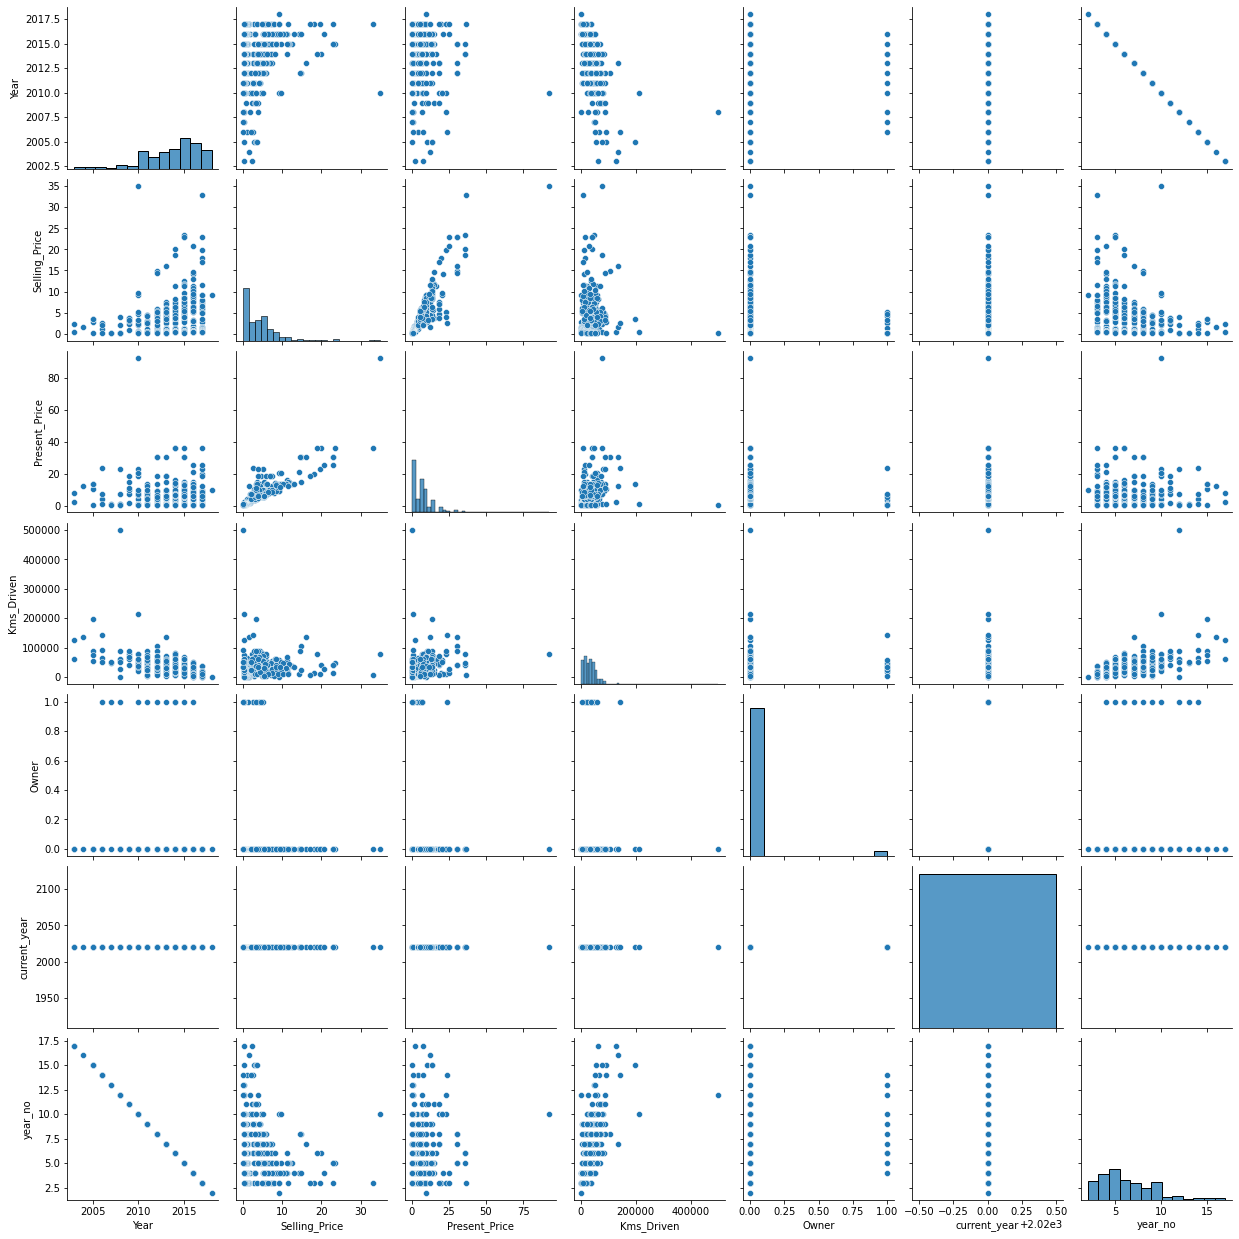

In [97]:
sns.pairplot(df1)

<AxesSubplot:>

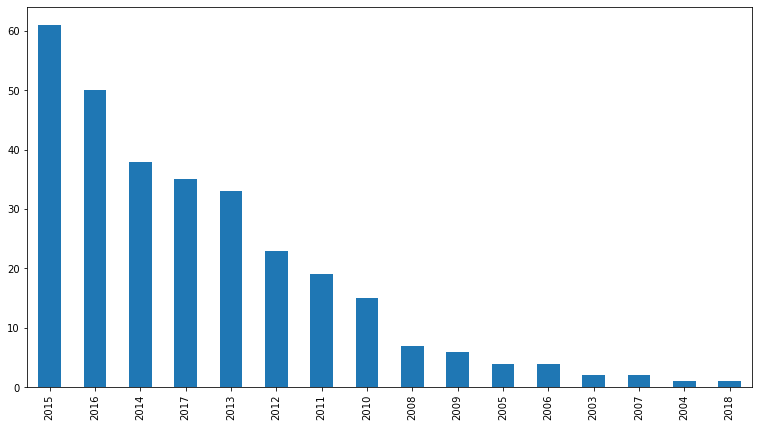

In [98]:
# Visualization is the best way to understand and analyse the data
plt.figure(figsize=(13,7))
df1['Year'].value_counts().plot.bar()

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

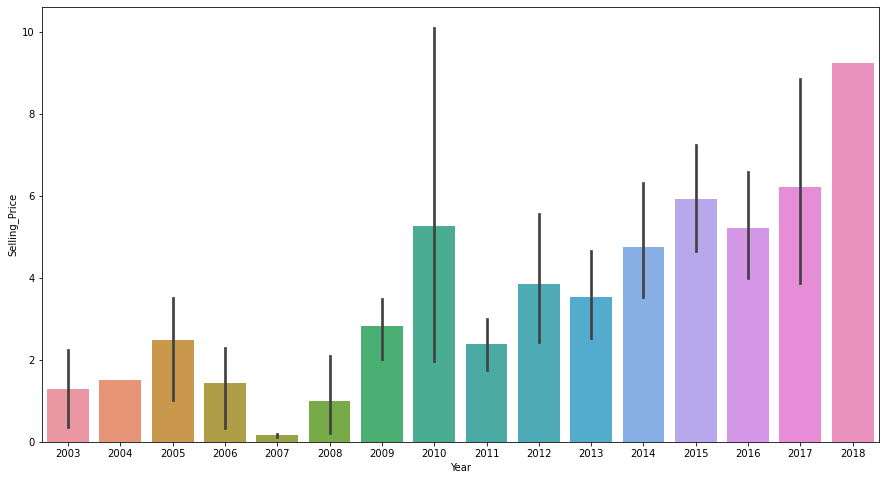

In [99]:
plt.figure(figsize=(15,8))
sns.barplot(x='Year',y='Selling_Price', data=df1)

In [100]:
# From the above graph it is observed that Car Selling was low in 2007 and high in 2018

#### Histograms represent the data distribution by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

In [101]:
# The simple way is to use for loop to go through all the columns

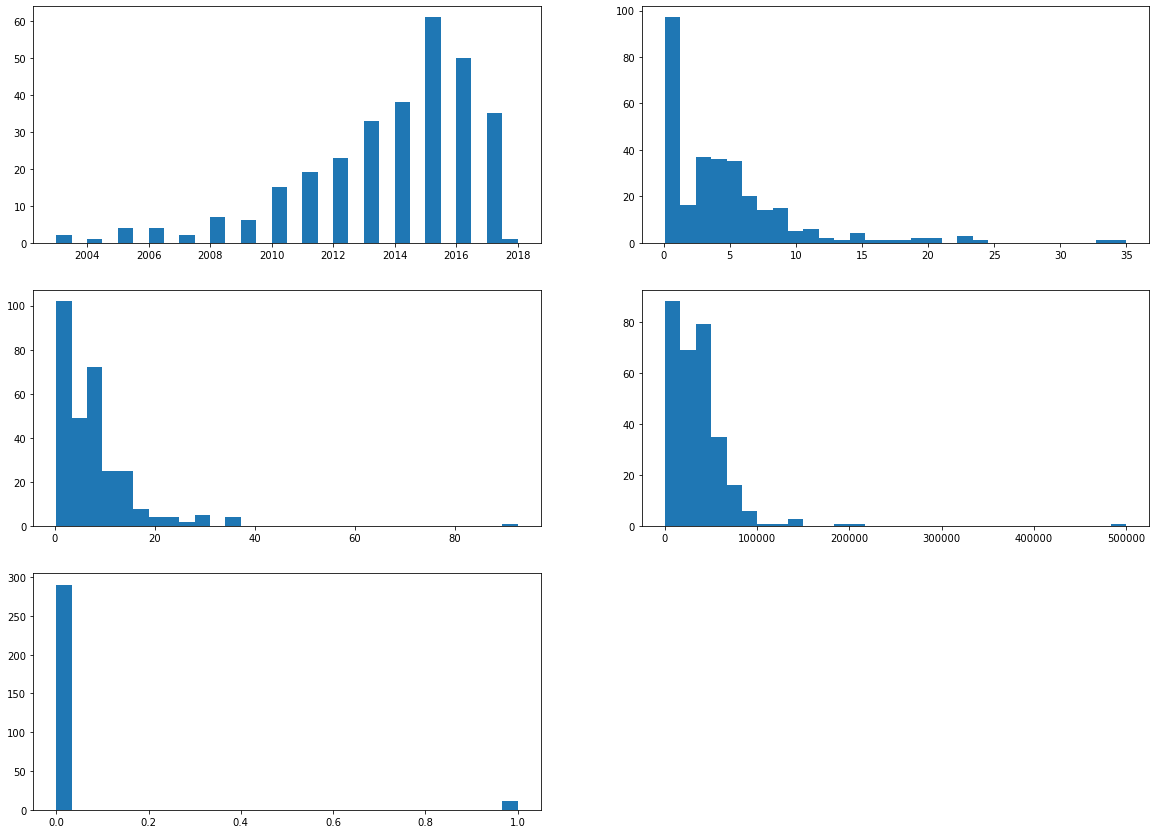

In [102]:
# Plotting the histogram for numerical column
plt.figure(figsize=(20,20))
for i in range(len(numerical_columns)):
    plt.subplot(4,2,i+1)
    plt.hist(df1[numerical_columns[i]], bins=30)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


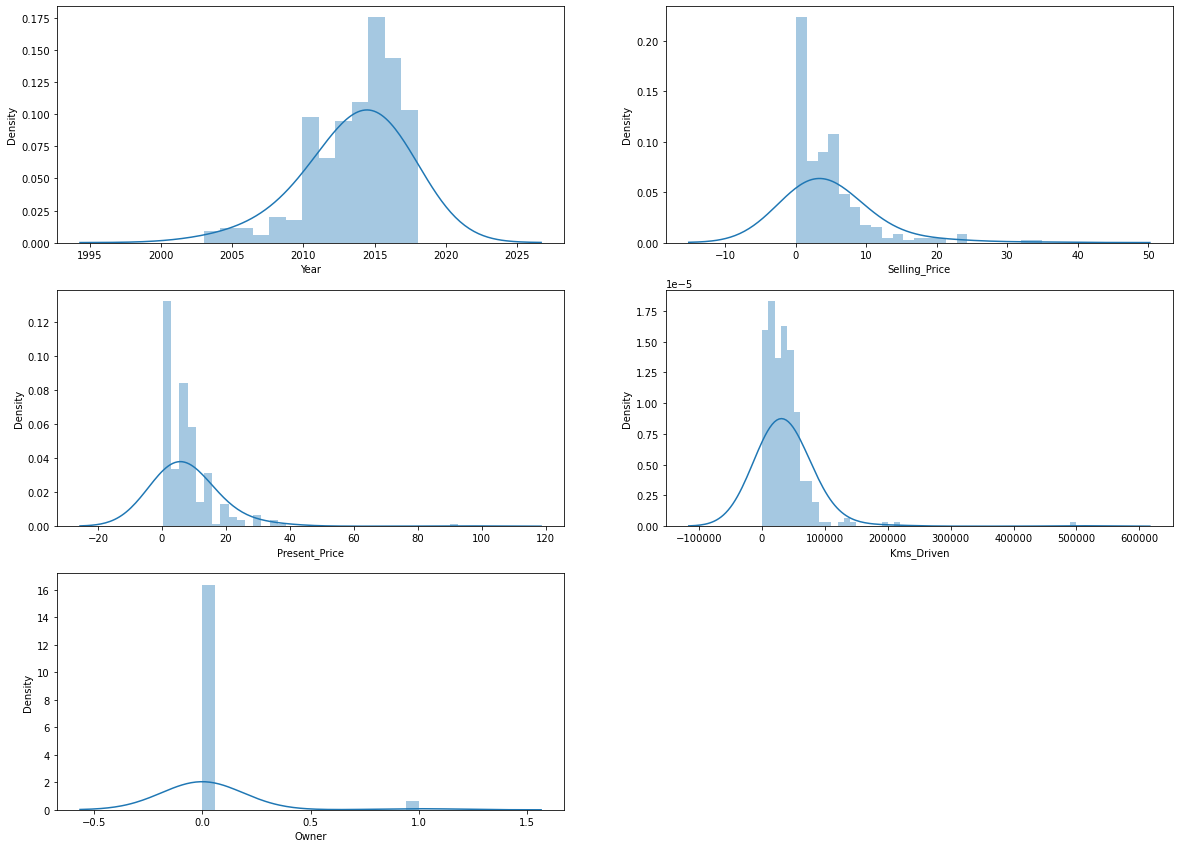

In [103]:
# Plotting the distplot for numerical column
plt.figure(figsize=(20,20))
for i in range(len(numerical_columns)):
    plt.subplot(4,2,i+1)
    sns.distplot(df1[numerical_columns[i]], kde_kws = {'bw' : 1})

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

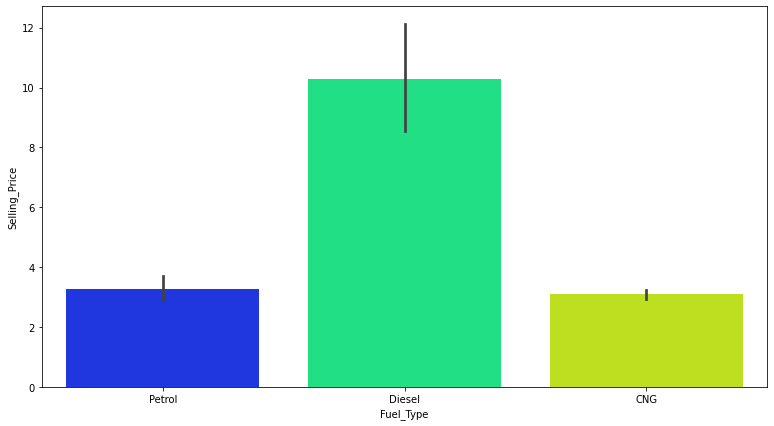

In [104]:
plt.figure(figsize=(13,7))
sns.barplot(x='Fuel_Type', y='Selling_Price', data=df1, palette = "gist_rainbow_r")

In [105]:
# From the above graph it is observed that Diesel cars were more expensive than Petrol and CNG

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

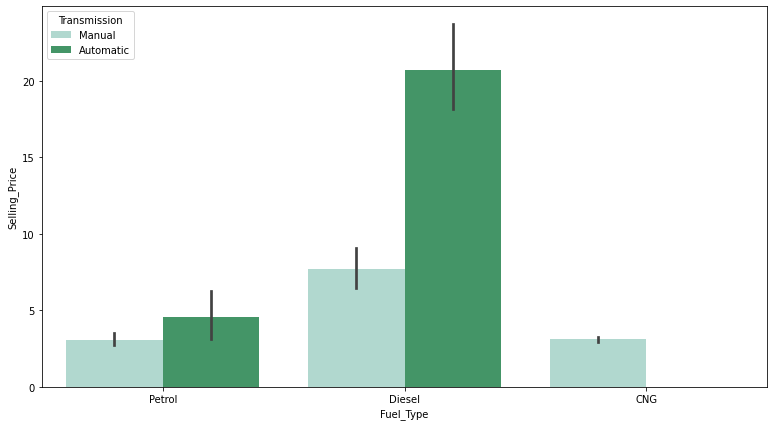

In [106]:
plt.figure(figsize=(13,7))
sns.barplot(x='Fuel_Type', y='Selling_Price',hue='Transmission', data=df1, palette = "BuGn")

In [107]:
# From the above graph it is observed that CNG does not have any Transmission i.e., Manual and Automatic
## Fuel_Type Diesel has more Automatic transmission than Petrol

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

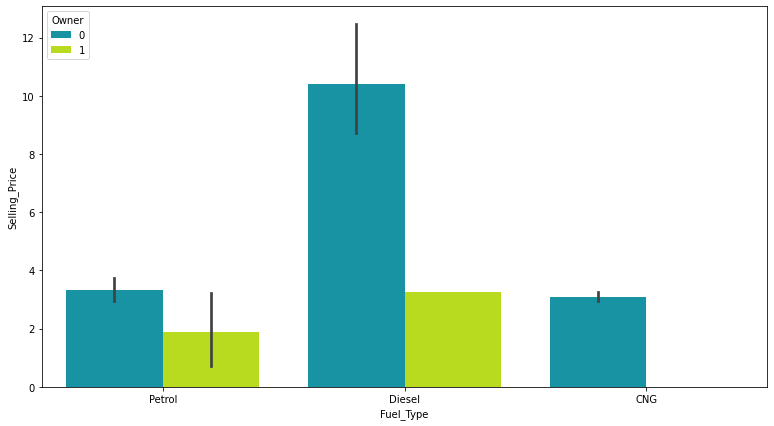

In [108]:
plt.figure(figsize=(13,7))
sns.barplot(x='Fuel_Type', y='Selling_Price',hue='Owner', data=df1, palette = "nipy_spectral")

In [109]:
df1.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,current_year,year_no
Year,1.000000,0.236141,-0.047584,-0.524342,-0.146629,NaN,-1.000000
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.101445,NaN,-0.236141
Present_Price,-0.047584,0.878983,1.000000,0.203647,-0.055443,NaN,0.047584
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.021857,NaN,0.524342
Owner,-0.146629,-0.101445,-0.055443,0.021857,1.000000,NaN,0.146629
current_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_no,-1.000000,-0.236141,0.047584,0.524342,0.146629,NaN,1.000000


In [110]:
# There is a correlation between Selling price and Present price. 

<AxesSubplot:>

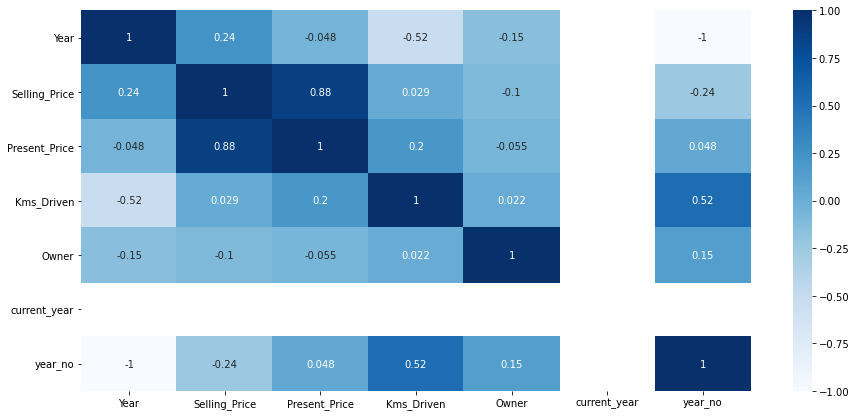

In [111]:
plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(), annot=True, cmap='Blues')

In [112]:
df1=df1.drop(['Year', 'Car_Name','current_year'], 1)

In [113]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,year_no
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [114]:
df1=pd.get_dummies(df1, drop_first=True)

In [115]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,year_no,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [116]:
df1.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,year_no,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.101445,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,-0.055443,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.021857,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.101445,-0.055443,0.021857,1.000000,0.146629,-0.052859,0.055416,0.115884,0.024086
year_no,-0.236141,0.047584,0.524342,0.146629,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.052859,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055416,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.115884,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,0.024086,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [117]:
# There is a strong correlation between Selling price and Fuel_Type_Diesel.
# There is a correlation between Price diff and Selling Price.
# There is a correlation between Price diff and Selling Price.


<AxesSubplot:>

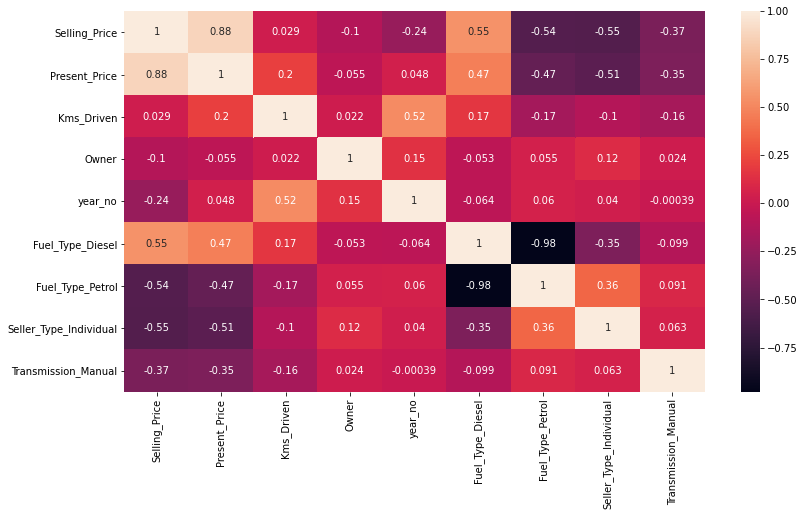

In [118]:
plt.figure(figsize=(13,7))
sns.heatmap(df1.corr(), annot=True)

In [119]:
X=df1.drop('Selling_Price',1)
y=df1['Selling_Price']

In [120]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [121]:
print(model.feature_importances_)

[0.39585124 0.04094908 0.00042279 0.07829608 0.21084816 0.01999476
 0.1321964  0.12144149]


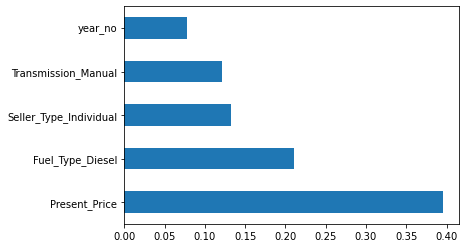

In [122]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [124]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [125]:
lr.fit(X_train, y_train)

LinearRegression()

In [126]:
pred=lr.predict(X_test)

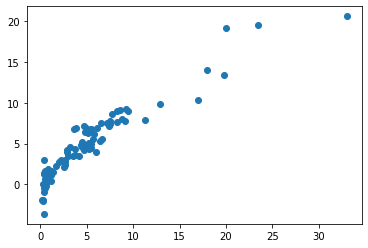

In [127]:
plt.scatter(y_test,pred)

In [128]:
from sklearn.ensemble import RandomForestRegressor

#### This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [129]:
regressor=RandomForestRegressor()

In [130]:
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [131]:
pred=regressor.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

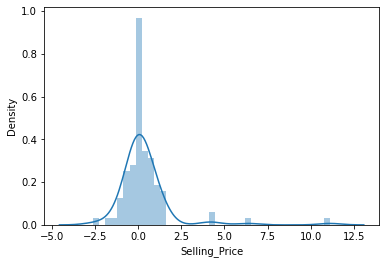

In [132]:
sns.distplot(y_test-pred)


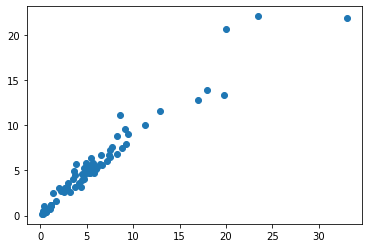

In [133]:
plt.scatter(y_test,pred)

In [134]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()

In [135]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [136]:
X_test.head()

,Present_Price,Kms_Driven,Owner,year_no,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
223,9.400,61381,0,5,1,0,0,1
150,0.826,6000,0,9,0,1,1,1
226,5.700,24678,0,5,0,1,0,1
296,11.600,33988,0,4,1,0,0,1
52,19.770,15000,0,3,1,0,0,0


In [137]:
pred=regressor.predict(X_test)

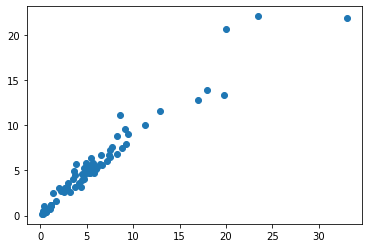

In [138]:
plt.scatter(y_test, pred)

In [139]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.7655230769230771
MSE: 2.670650836703294
RMSE: 1.634212604498966


#### MSE: the average squared difference between the estimated values and the actual value. MSE is a risk function, corresponding to the expected value of the squared error loss.

#### MAE: mean absolute error is a measure of errors between paired observations expressing the same phenomenon. 

#### RMSE: The root-mean-square deviation or root-mean-square error is a frequently used measure of the differences between values predicted by a model or an estimator and the values observed.

In [140]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(dt, file)